**Taller final del Módulo 1:Procesamiento de series de tiempo con redes de propagación hacia adelante y redes recurrentes**
**texto en negrita**   



In [1]:
from google.colab import files

# Subir el archivo CSV generado
uploaded = files.upload()

Saving datos_acelerometro.csv to datos_acelerometro.csv


In [2]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


Epoch 1/20
25/25 [==============================] - 3s 16ms/step - loss: 127.1995 - val_loss: 125.6848
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 117.7946 - val_loss: 115.5255
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 106.9457 - val_loss: 103.6718
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 94.6625 - val_loss: 90.4099
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 81.5401 - val_loss: 77.1978
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 69.1191 - val_loss: 65.0666
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 58.2569 - val_loss: 54.9407
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 49.6849 - val_loss: 47.4653
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 43.6321 - val_loss: 42.8756
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 40.1570 - val_loss: 

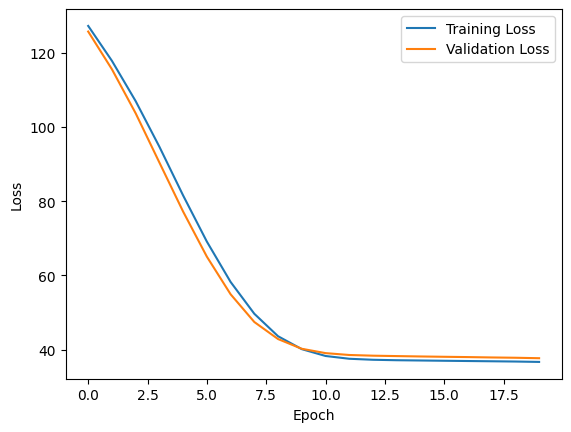

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('datos_acelerometro.csv')

# Separar los datos en características (X) y etiquetas (y)
X = df[['Eje X', 'Eje Y', 'Eje Z']].values
y = df['Tiempo'].values

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir los datos en series de tiempo con una ventana de tamaño 1
timesteps = 1
X_series = np.array([X_scaled[i-timesteps:i] for i in range(timesteps, len(X_scaled))])
y_series = y[timesteps:]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Análisis de datos de un acelerómetro utilizando una red neuronal recurrente simple (SimpleRNN) en TensorFlow/Keras**

Carga de datos: Se carga el archivo CSV que contiene los datos del acelerómetro en un DataFrame de Pandas. Los datos se separan en características (X), que son las lecturas de los ejes X, Y y Z del acelerómetro, y las etiquetas (y), que son los valores de tiempo.

Preprocesamiento de datos: Los datos se escalan utilizando MinMaxScaler para asegurar que todas las características estén en el rango [0, 1]. Luego, se convierten en series de tiempo con una ventana de tamaño 1, lo que significa que cada muestra en la serie contiene solo una lectura de los ejes X, Y y Z del acelerómetro.

División de datos: Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split. El 80% de los datos se utilizan para entrenamiento y el 20% restante se utilizan para pruebas.

Definición del modelo: Se define un modelo de red neuronal secuencial que consta de una capa SimpleRNN con 64 unidades y una capa densa de salida con una unidad. La función de activación utilizada en la capa SimpleRNN es ReLU (Rectified Linear Unit), que ayuda a introducir no linealidad en el modelo.

Compilación del modelo: El modelo se compila utilizando el optimizador Adam y la función de pérdida de error cuadrático medio (MSE).

Entrenamiento del modelo: El modelo se entrena utilizando los datos de entrenamiento durante 20 épocas con un tamaño de lote de 32. Durante el entrenamiento, se supervisa la pérdida en los conjuntos de entrenamiento y prueba.

Visualización de la pérdida: Se grafica la pérdida durante el entrenamiento para evaluar el rendimiento del modelo. Se traza la pérdida en el conjunto de entrenamiento y en el conjunto de validación a lo largo de las épocas.

La interpretación de los resultados se basa en la visualización de la curva de pérdida. Se busca que la pérdida en el conjunto de entrenamiento disminuya y que la pérdida en el conjunto de validación también disminuya o se estabilice, lo que indica que el modelo no está sobreajustando los datos de entrenamiento y generaliza bien a los datos no vistos. Si la pérdida en el conjunto de validación comienza a aumentar mientras que la pérdida en el conjunto de entrenamiento sigue disminuyendo, podría ser un indicador de sobreajuste.

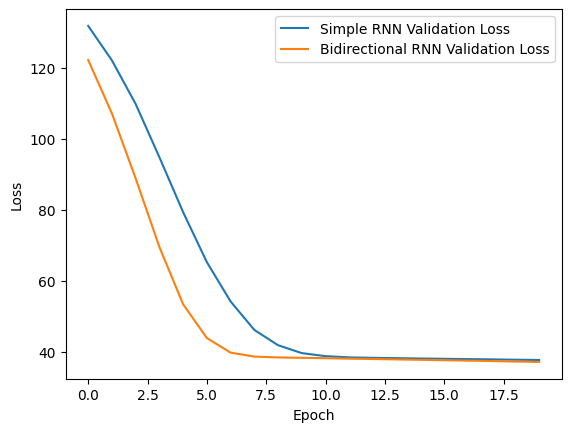

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('datos_acelerometro.csv')

# Separar los datos en características (X) y etiquetas (y)
X = df[['Eje X', 'Eje Y', 'Eje Z']].values
y = df['Tiempo'].values

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir los datos en series de tiempo con una ventana de tamaño 1
timesteps = 1
X_series = np.array([X_scaled[i-timesteps:i] for i in range(timesteps, len(X_scaled))])
y_series = y[timesteps:]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal Simple RNN
model_simple_rnn = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(1)
])

# Compilar el modelo Simple RNN
model_simple_rnn.compile(optimizer=Adam(), loss='mse')

# Entrenar el modelo Simple RNN
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Definir el modelo de red neuronal Bidirectional RNN
model_bidirectional_rnn = Sequential([
    Bidirectional(SimpleRNN(64, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compilar el modelo Bidirectional RNN
model_bidirectional_rnn.compile(optimizer=Adam(), loss='mse')

# Entrenar el modelo Bidirectional RNN
history_bidirectional_rnn = model_bidirectional_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Graficar la pérdida durante el entrenamiento para los dos modelos
plt.plot(history_simple_rnn.history['val_loss'], label='Simple RNN Validation Loss')
plt.plot(history_bidirectional_rnn.history['val_loss'], label='Bidirectional RNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Análisis de datos de un acelerómetro utilizando dos tipos de redes neuronales recurrentes (RNN) en TensorFlow/Keras: una red neuronal RNN simple y una red neuronal RNN bidireccional**


Carga de datos: Se carga el archivo CSV que contiene los datos del acelerómetro en un DataFrame de Pandas. Los datos se separan en características (X), que son las lecturas de los ejes X, Y y Z del acelerómetro, y las etiquetas (y), que son los valores de tiempo.

Preprocesamiento de datos: Los datos se escalan utilizando MinMaxScaler para asegurar que todas las características estén en el rango [0, 1]. Luego, se convierten en series de tiempo con una ventana de tamaño 1, lo que significa que cada muestra en la serie contiene solo una lectura de los ejes X, Y y Z del acelerómetro.

División de datos: Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split. El 80% de los datos se utilizan para entrenamiento y el 20% restante se utilizan para pruebas.

Definición de modelos: Se definen dos modelos de red neuronal secuencial: uno con una capa RNN simple y otro con una capa RNN bidireccional. Ambos modelos tienen una capa densa de salida con una unidad. La función de activación utilizada en las capas RNN es ReLU (Rectified Linear Unit).

Compilación de modelos: Ambos modelos se compilan utilizando el optimizador Adam y la función de pérdida de error cuadrático medio (MSE).

Entrenamiento de modelos: Ambos modelos se entrenan utilizando los datos de entrenamiento durante 20 épocas con un tamaño de lote de 32. Durante el entrenamiento, se supervisa la pérdida en los conjuntos de entrenamiento y prueba.

Visualización de la pérdida: Se grafica la pérdida durante el entrenamiento en el conjunto de validación para ambos modelos. Esto permite comparar el rendimiento de los modelos Simple RNN y Bidirectional RNN. Se busca que la pérdida en el conjunto de validación disminuya o se estabilice a medida que aumentan las épocas, indicando que los modelos generalizan bien a los datos no vistos.

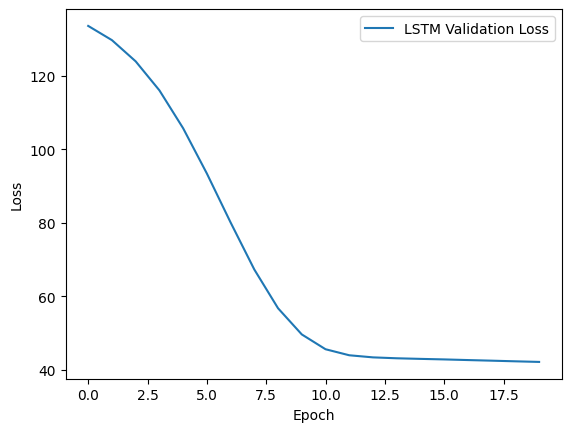

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('datos_acelerometro.csv')

# Separar los datos en características (X) y etiquetas (y)
X = df[['Eje X', 'Eje Y', 'Eje Z']].values
y = df['Tiempo'].values

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir los datos en series de tiempo con una ventana de tamaño 1
timesteps = 1
X_series = np.array([X_scaled[i-timesteps:i] for i in range(timesteps, len(X_scaled))])
y_series = y[timesteps:]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal LSTM
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(1)
])

# Compilar el modelo LSTM
model_lstm.compile(optimizer=Adam(), loss='mse')

# Entrenar el modelo LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Graficar la pérdida durante el entrenamiento
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Análisis de datos de un acelerómetro utilizando una red neuronal LSTM (Long Short-Term Memory) en TensorFlow/Keras**


Carga de datos: Se carga el archivo CSV que contiene los datos del acelerómetro en un DataFrame de Pandas. Los datos se separan en características (X), que son las lecturas de los ejes X, Y y Z del acelerómetro, y las etiquetas (y), que son los valores de tiempo.

Preprocesamiento de datos: Los datos se escalan utilizando MinMaxScaler para asegurar que todas las características estén en el rango [0, 1]. Luego, se convierten en series de tiempo con una ventana de tamaño 1, lo que significa que cada muestra en la serie contiene solo una lectura de los ejes X, Y y Z del acelerómetro.

División de datos: Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split. El 80% de los datos se utilizan para entrenamiento y el 20% restante se utilizan para pruebas.

Definición del modelo: Se define un modelo de red neuronal secuencial que consta de una capa LSTM con 64 unidades y una capa densa de salida con una unidad. La función de activación utilizada en la capa LSTM es ReLU (Rectified Linear Unit), que ayuda a introducir no linealidad en el modelo.

Compilación del modelo: El modelo se compila utilizando el optimizador Adam y la función de pérdida de error cuadrático medio (MSE).

Entrenamiento del modelo: El modelo se entrena utilizando los datos de entrenamiento durante 20 épocas con un tamaño de lote de 32. Durante el entrenamiento, se supervisa la pérdida en los conjuntos de entrenamiento y prueba.

Visualización de la pérdida: Se grafica la pérdida durante el entrenamiento en el conjunto de validación para evaluar el rendimiento del modelo. La pérdida en el conjunto de validación se utiliza como métrica para verificar el ajuste del modelo.

La interpretación de los resultados se basa en la visualización de la curva de pérdida durante el entrenamiento. Se busca que la pérdida en el conjunto de validación disminuya o se estabilice a medida que aumentan las épocas, lo que indica que el modelo generaliza bien a los datos no vistos. Si la pérdida en el conjunto de validación comienza a aumentar, podría ser un indicador de sobreajuste.